## MainFlow Services and Technologies Internship
### DATA ANALYSIS AND DATA SCIENCE USING PYTHON
#### Task 06: Time Series analysis
#### Analyssis of Sales Data 


In [5]:
### Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
## Importing Dataset
data= pd.read_csv("C:\\Users\\HP\\Downloads\\sales_data_expanded.csv")
data.head()

,Product ID,Product Name,Date,Sales,Price
0,206,iPad Pro,2024-02-23,28,1423.19
1,204,OnePlus 11,2024-01-25,61,775.40
2,203,Google Pixel 7,2024-03-22,9,1401.23
3,216,Amazon Fire HD 10,2024-06-17,47,1803.13
4,217,Google Pixel Tablet,2024-02-21,132,1644.09


In [7]:
# Aggregate sales by date
data_grouped = data.groupby("Date")["Sales"].sum().reset_index()
data_grouped.set_index("Date", inplace=True)

In [8]:
data_grouped.head()

,Sales
Date,
2024-01-01,1549
2024-01-02,1719
2024-01-03,1689
2024-01-04,1806
2024-01-05,1759


#### 2.1  Visualization of sales treds over time

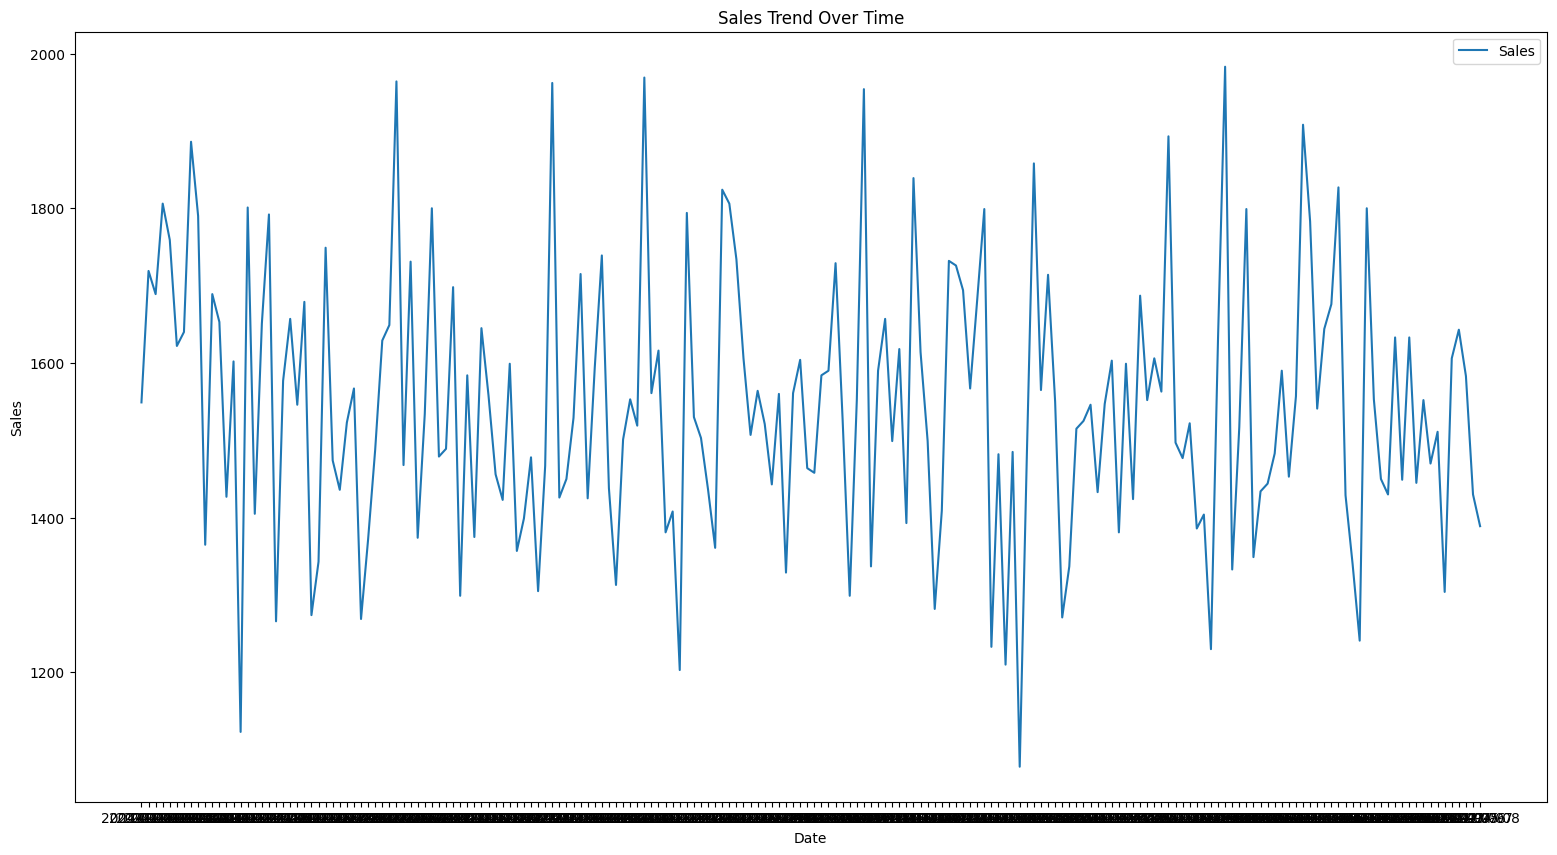

In [9]:
# Plot sales trends
plt.figure(figsize=(19, 10))
sns.lineplot(x=data_grouped.index, y=data_grouped["Sales"], label="Sales")
plt.title("Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

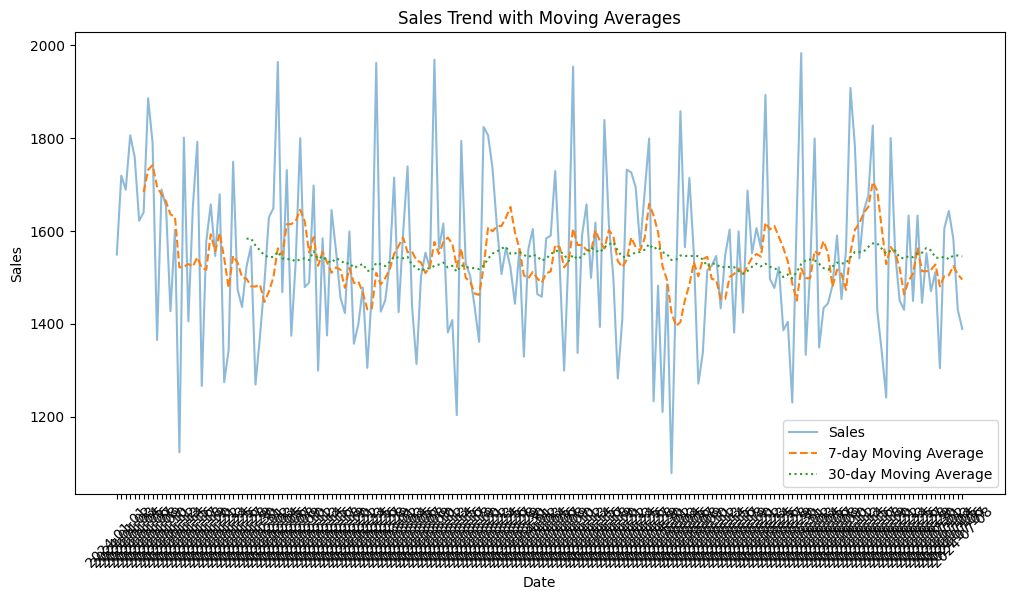

In [10]:
#.# Plot moving average to observe fluctuations
data_grouped["7-day MA"] = data_grouped["Sales"].rolling(window=7).mean()
data_grouped["30-day MA"] = data_grouped["Sales"].rolling(window=30).mean()

plt.figure(figsize=(12, 6))
sns.lineplot(data=data_grouped, x=data_grouped.index, y="Sales", label="Sales", alpha=0.5)
sns.lineplot(data=data_grouped, x=data_grouped.index, y="7-day MA", label="7-day Moving Average", linestyle="dashed")
sns.lineplot(data=data_grouped, x=data_grouped.index, y="30-day MA", label="30-day Moving Average", linestyle="dotted")
plt.title("Sales Trend with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.legend()
plt.show()

#### Use of ARIMA model for forcasting 


In [11]:
### required Libraries 
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error


In [12]:
### Check stationarity using ADF Test
def adf_test(series):
    result = adfuller(series)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    if result[1] < 0.05:
        print("Data is stationary.")
    else:
        print("Data is not stationary.")

adf_test(data_grouped["Sales"])

ADF Statistic: -13.561319113171951
p-value: 2.3071020411322535e-25
Data is stationary.


### Inference-
1. Augmented Dickey-Fuller test suggesting that data is stationary as more negative ADF statisitcs indicates stronger evidence agianst the null hypothesis of non stationarity
2. Also p-value less than 0.05 is considered as statistically significant our case it far smaller than that.
3. SO, Very low p-value and large negative ADF stat suggest that our data is stationary.The ADF test strongly suggests that your data doesn't have a trend or seasonality. It fluctuates around a constant mean and has a constant variance, which are the hallmarks of stationarity.
4. This is very good for time series analysis, as many models require stationary data.

In [13]:
### Differencing to make data stationary if not
data_grouped["Sales_Diff"] = data_grouped["Sales"].diff().dropna()


In [14]:
# Fit ARIMA Model
model = ARIMA(data_grouped["Sales"], order=(1,1,1))  # (p,d,q) values can be tuned
model_fit = model.fit()



C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [15]:
### Forecast future sales
forecast_steps = 30  # Predict next 30 days
forecast = model_fit.forecast(steps=forecast_steps)

In [16]:
# Create forecast DataFrame
forecast_dates = pd.date_range(start=data_grouped.index[-1], periods=forecast_steps+1, freq="D")[1:]
forecast_data = pd.DataFrame({"Date": forecast_dates, "Forecasted_Sales": forecast.values})


In [17]:
forecast_data.head()

,Date,Forecasted_Sales
0,2024-07-09,1542.734726
1,2024-07-10,1544.519087
2,2024-07-11,1544.539798
3,2024-07-12,1544.540038
4,2024-07-13,1544.540041


In [19]:
print(forecast_data.dtypes)

Date                datetime64[ns]
Forecasted_Sales           float64
dtype: object


In [20]:
forecast_data['Date'] = pd.to_datetime(forecast_data['Date'])


In [21]:
print(forecast_data['Date'].isnull().sum())

0


TypeError: tz must be string or tzinfo subclass, not <matplotlib.category.UnitData object at 0x000002BA7362D820>.

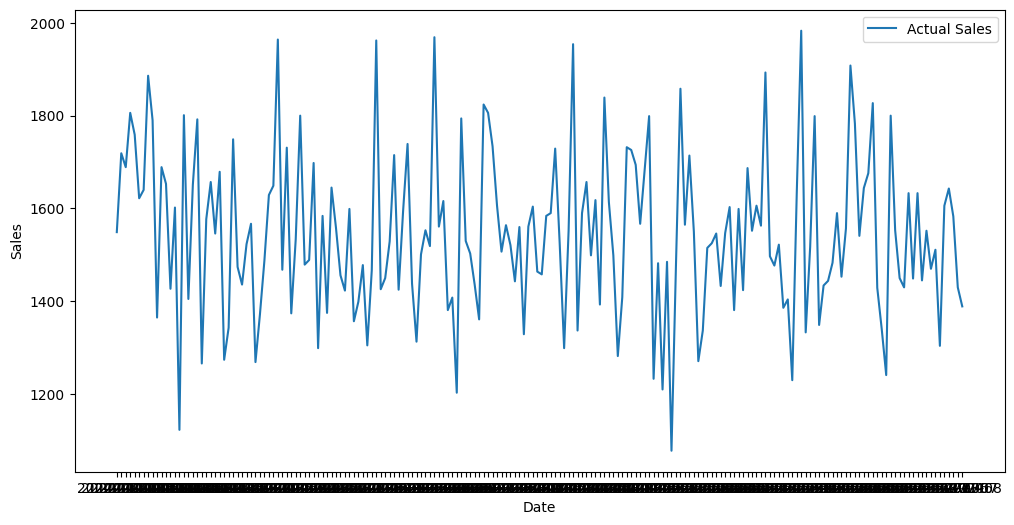

In [22]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=data_grouped, x=data_grouped.index, y="Sales", label="Actual Sales")
sns.lineplot(data=forecast_data, x="Date", y="Forecasted_Sales", label="Forecasted Sales", linestyle="dashed")
plt.title("Sales Forecasting Using ARIMA")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

In [23]:
print(forecast_data['Date'].duplicated().sum())

0


In [24]:
# Convert 'Date' column in forecast_data to datetime
forecast_data["Date"] = pd.to_datetime(forecast_data["Date"])

# Ensure index of data_grouped is datetime
data_grouped.index = pd.to_datetime(data_grouped.index)


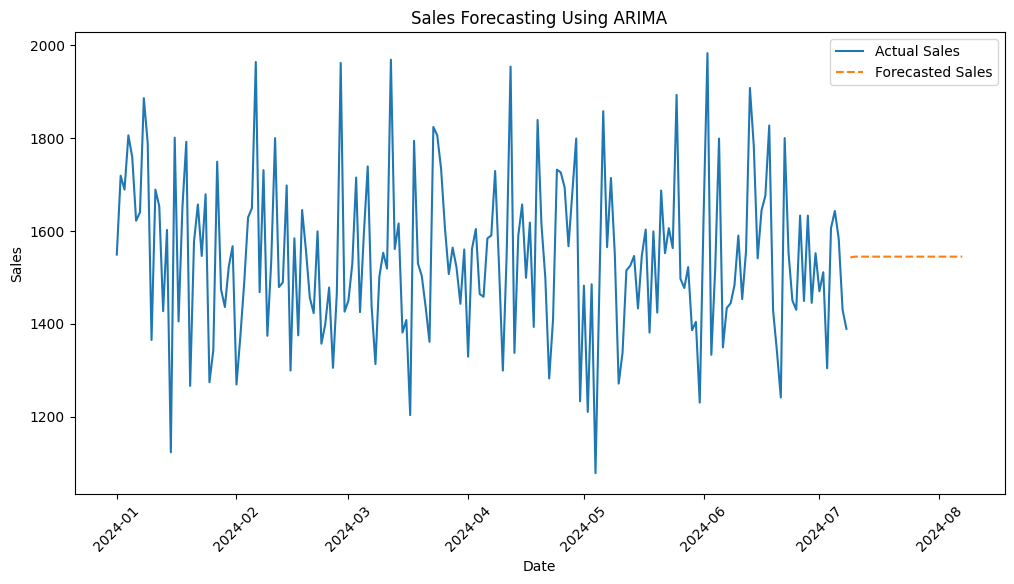

In [25]:
plt.figure(figsize=(12, 6))

sns.lineplot(data=data_grouped, x=data_grouped.index, y="Sales", label="Actual Sales")
sns.lineplot(data=forecast_data, x="Date", y="Forecasted_Sales", label="Forecasted Sales", linestyle="dashed")

plt.title("Sales Forecasting Using ARIMA")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


### Project_02_Description: Predicting Heart Disease Using Logistic Regression

In [69]:
### Dataset
data = pd.read_csv("C:\\Users\\HP\\Downloads\\heart_disease.csv")
data.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [70]:
### Check for missing or inconsistent data
data.describe()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000
mean,54.438944,0.679868,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241
std,9.038662,0.467299,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000


In [72]:
data.dtypes

Age            int64
Sex            int64
ChestPain     object
RestBP         int64
Chol           int64
Fbs            int64
RestECG        int64
MaxHR          int64
ExAng          int64
Oldpeak      float64
Slope          int64
Ca           float64
Thal          object
AHD           object
dtype: object

In [74]:
missing_values = data.isnull().sum()
print(missing_values)

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           4
Thal         2
AHD          0
dtype: int64


In [76]:
data.dropna(inplace=True)

In [77]:
missing_values = data.isnull().sum()
print(missing_values)

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           0
Thal         0
AHD          0
dtype: int64


In [75]:
# Check for duplicate rows
duplicate_data = data.duplicated().sum()
print(duplicate_data)

0


In [95]:
#### Convert 'Heart Disease' column from 'Yes'/'No' to 1/0
data['AHD'] = data['AHD'].map({'Yes': 1, 'No': 0})


#### Feature Engineering

In [96]:
### Selecting features and target
X = data[["Age", "Sex", "Chol", "RestBP"]]
y = data["AHD"]


In [97]:
###Libraries
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [98]:
#### Normalization / Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [99]:
#### Model Training
####Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [100]:
### Train the Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [101]:
#### Predictions
y_pred = model.predict(X_test)


In [102]:
print(y_pred)

[0 0 0 1 1 0 0 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0
 1 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1]


In [103]:
#### Model Evaluation
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


In [108]:
print("\nConfusion Matrix:\n",conf_matrix)
print("\nEvaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")



Confusion Matrix:
 [[24 12]
 [12 12]]

Evaluation Metrics:
Accuracy: 0.60
Precision: 0.50
Recall: 0.50
F1 Score: 0.50


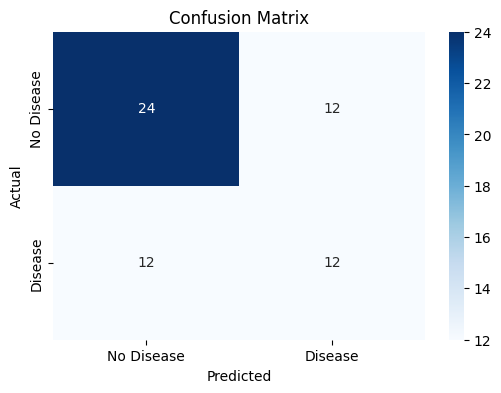

In [109]:
### Visualization
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


### Model Evaluation:
1. Confusion Matrix Interpretation:

True Positives (TP) = 12 → Correctly predicted "Heart Disease" cases.
True Negatives (TN) = 24 → Correctly predicted "No Heart Disease" cases.
False Positives (FP) = 12 → Incorrectly predicted "Heart Disease" when it was "No".
False Negatives (FN) = 12 → Missed actual "Heart Disease" cases.

2. Accuracy - 60%

The model correctly predicts 60% of the cases.
However, accuracy alone isn't enough when classes are imbalanced.

3. Precision - 50% 

Out of all predicted "Heart Disease" cases, only 50% were correct.
A low precision indicates a high false positive rate, meaning the model is misclassifying healthy individuals as having heart disease.

4. Recall - 50% 

The model identifies only 50% of actual "Heart Disease" cases.
A low recall means it is missing many real cases of heart disease (high false negatives).

5. F1 Score - 50%

The balance between precision and recall is weak.
A low F1 score suggests the model struggles in making correct positive predictions.

#### -------------------------------------------------------------------------------------------------------------------- ####